# Data Mining - Decision Trees 🌳


**Authors:** [Melissa Perez](https://github.com/MelissaPerez09), [Adrian Flores](https://github.com/adrianRFlores), [Andrea Ramirez](https://github.com/Andrea-gt)

**Description:** Construcción y comparación de diferentes modelos de clasificación para predecir el precio de casas de un DataSet. Se exploran diversas técnicas, como árboles de decisión simples, árboles con validación cruzada y Random Forest, con el objetivo de identificar el enfoque más efectivo en términos de precisión y prevención del sobreajuste.

## Import Libraries ⬇️

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, accuracy_score,
precision_score, recall_score, ConfusionMatrixDisplay)
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

random_state = 42

C:\Users\agria\AppData\Local\Temp\ipykernel_26324\1120592823.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data Upload 📄

In [4]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Exploratory Analysis 🔎

### Variable Categorization

#### **Numerical**

`Continuous`: LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice

`Discrete`: Id, MSSubClass, Overa

#### **Categorical**
`Nominal`: MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, Electrical, GarageType, MiscFeature, SaleType, SaleCondition

`Ordinal`: ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence

### Descriptive Statistics

In [4]:
df_describe = df.loc[:, df.columns != 'Id']
df_describe.describe(include=[np.number])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


En el análisis descriptivo de la variable objetivo, SalePrice, observamos que su distribución cuartílica revela puntos clave en la distribución de precios de venta. El primer cuartil (Q1), que representa el 25% inferior de los datos, se sitúa en 129,975. Esto indica que el 25% de las viviendas se vendieron a un precio igual o inferior a esta cifra. El segundo cuartil (Q2), o mediana, se encuentra en 163,000, lo que significa que la mitad de las viviendas se vendieron a un precio igual o inferior a este valor. Por último, el tercer cuartil (Q3), que abarca el 75% de los datos, se encuentra en 214,000, indicando que el 75% de las viviendas se vendieron a precios iguales o inferiores a este monto. A continuación, se presentan dos gráficos para ilustrar mejor la distribución de estos cuartiles en la variable SalePrice.

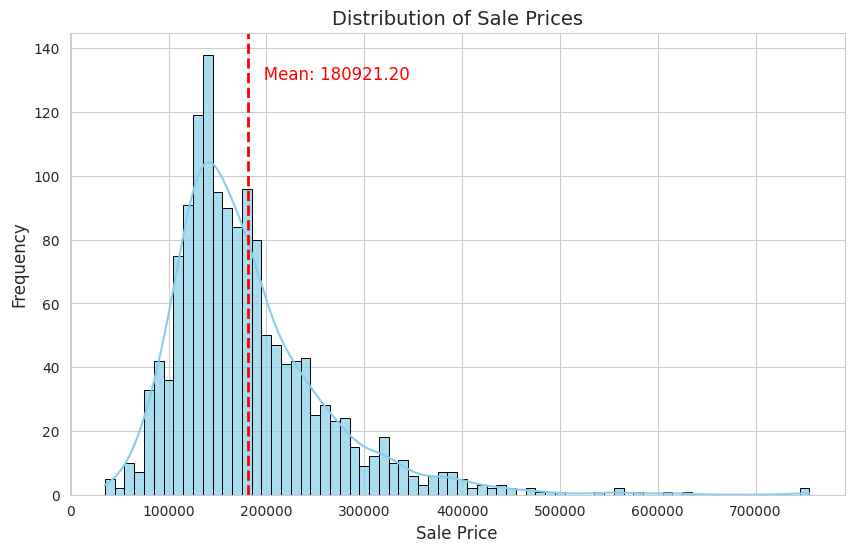

In [5]:
sns.set_style("whitegrid")

# Creating a new figure with specified size
plt.figure(figsize=(10, 6))

# Plotting the histogram of 'SalePrice' column from DataFrame 'df'
sns.histplot(x='SalePrice', data=df, kde=True, color='skyblue', binwidth=10000, alpha=0.7, edgecolor='black')

# Plot settings
plt.title('Distribution of Sale Prices', fontsize=14, fontweight='500')
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Calculating the mean of 'SalePrice' column
mean_value = df['SalePrice'].mean()

# Adding a vertical line representing the mean value
plt.axvline(mean_value, color='r', linestyle='--', linewidth=2)

# Adding text annotation for the mean value
plt.text(mean_value, plt.ylim()[1]*0.9, '   Mean: {:.2f}'.format(mean_value), color='r', fontsize=12)

plt.show()

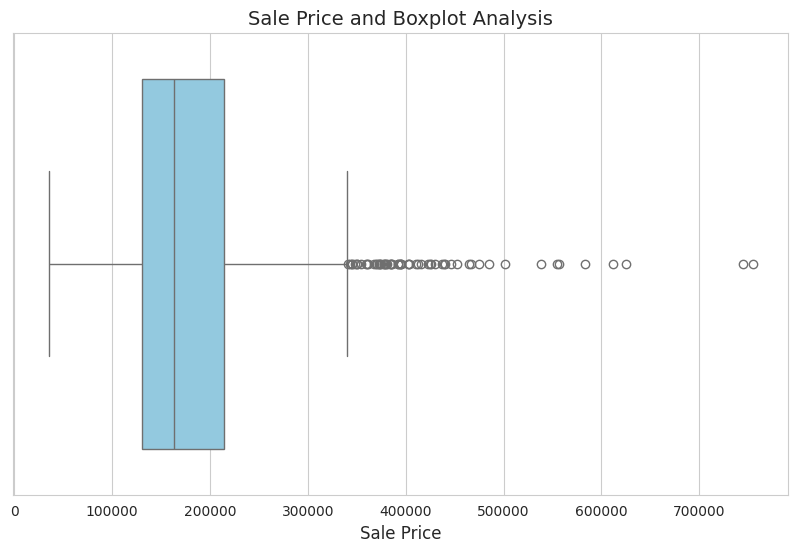

In [6]:
sns.set_style("whitegrid")

# Creating a new figure with specified size
plt.figure(figsize=(10, 6))

# Plotting the boxplot of 'SalePrice' column from DataFrame 'df'
sns.boxplot(x='SalePrice', data=df, color='skyblue')

# Plot settings
plt.title('Sale Price and Boxplot Analysis', fontsize=14, fontweight='500')
plt.xlabel('Sale Price', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### NaN Value Analysis

In [7]:
# Checking for columns with missing values
nullValues = df.isnull().sum()

# Selecting columns with missing values
nullValues = nullValues[nullValues > 0]

# Printing information for any columns with missing values
if not nullValues.empty:
    print("Columns with NaN values:")
    print("-" * 40)
    for column, nans in nullValues.items():
        print(f"{column: <30} | {nans: >5} missing values")
    print("-" * 40)
else:
    print("No columns with NaN values found.")

Columns with NaN values:
----------------------------------------
LotFrontage                    |   259 missing values
Alley                          |  1369 missing values
MasVnrType                     |     8 missing values
MasVnrArea                     |     8 missing values
BsmtQual                       |    37 missing values
BsmtCond                       |    37 missing values
BsmtExposure                   |    38 missing values
BsmtFinType1                   |    37 missing values
BsmtFinType2                   |    38 missing values
Electrical                     |     1 missing values
FireplaceQu                    |   690 missing values
GarageType                     |    81 missing values
GarageYrBlt                    |    81 missing values
GarageFinish                   |    81 missing values
GarageQual                     |    81 missing values
GarageCond                     |    81 missing values
PoolQC                         |  1453 missing values
Fence           

## Data Preprocessing 🗂️

### Handling Missing Values

In [5]:
# Remove rows with missing values in 'MasVnrType', 'MasVnrArea', and 'Electrical' columns.
df.dropna(subset=['MasVnrType', 'MasVnrArea', 'Electrical'], inplace=True)

In [ ]:
# Impute missing LotFrontage values based on the median LotFrontage within each neighborhood.
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [7]:
# Fill missing values in FireplaceQu with 'None'.
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [8]:
# Fill missing values in garage-related variables with 'None'.
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')

In [9]:
# Fill missing values in basement-related variables with 'None'.
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')

In [10]:
# Drop columns with a high count of missing values
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

### Encoding

In [11]:
# Columns to encode, separated by feature category
nominalFeatures = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                    'Heating', 'CentralAir', 'Electrical', 'GarageType', 'SaleType',
                    'SaleCondition','PavedDrive']

ordinalFeatures = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual','FireplaceQu',
                    'GarageQual', 'GarageCond']

otherOrdinalFeatures = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'GarageFinish']

In [12]:
# Convert nominal features into dummy variables
df = pd.get_dummies(df, columns=nominalFeatures)

In [13]:
# Define ordinal categories for each ordinal feature
ordinalCategories = [['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'] for _ in ordinalFeatures]

# Create an ordinal encoder
ordinalEncoder = OrdinalEncoder(categories=ordinalCategories)

# Fit and transform ordinal features
ordinalEncoded = ordinalEncoder.fit_transform(df[ordinalFeatures])

# Update dataframe with ordinal encoded features
for i, feature in enumerate(ordinalFeatures):
    df[feature] = ordinalEncoded[:, i]

In [14]:
# Define encoding categories for each other ordinal feature
encodingCategories = [
    ['None', 'No', 'Mn', 'Av', 'Gd'],  # BsmtExposure
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType1
    ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],  # BsmtFinType2
    ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],  # Functional
    ['None', 'Unf', 'RFn', 'Fin']  # GarageFinish
]

# Create an ordinal encoder
ordinalEncoder = OrdinalEncoder(categories=encodingCategories)

# Fit and transform other ordinal features
ordinalEncoded = ordinalEncoder.fit_transform(df[otherOrdinalFeatures])

# Update dataframe with ordinal encoded features
for i, feature in enumerate(otherOrdinalFeatures):
    df[feature] = ordinalEncoded[:, i]

### Splitting DataSet

In [16]:
# Create a copy of the dataframe
df_cp = df.copy()

# Separate target variable 'SalePrice' from features
y = df_cp.pop('SalePrice')
X = df_cp

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=random_state)

In [20]:
print(X_train.shape)
print(X_test.shape)

(1160, 224)
(291, 224)


## Decision Trees 🌲

### Initial Iteration Using All Variables

In [18]:
# Create a DecisionTreeRegressor model
clf = DecisionTreeRegressor(max_depth=4, random_state=random_state)

# Train the model on the training data
clf = clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = clf.predict(X_test)

[Text(0.5, 0.9, 'OverallQual <= 7.5\nsquared_error = 7659150419.573\nsamples = 470\nvalue = 217507.47'),
 Text(0.25, 0.7, 'OverallQual <= 6.5\nsquared_error = 2036655717.28\nsamples = 333\nvalue = 177060.949'),
 Text(0.125, 0.5, 'GrLivArea <= 1260.0\nsquared_error = 1130813774.714\nsamples = 207\nvalue = 156605.599'),
 Text(0.0625, 0.3, 'LotArea <= 2500.5\nsquared_error = 520536638.591\nsamples = 87\nvalue = 135515.563'),
 Text(0.03125, 0.1, 'squared_error = 164076875.0\nsamples = 8\nvalue = 92425.0'),
 Text(0.09375, 0.1, 'squared_error = 349562773.859\nsamples = 79\nvalue = 139879.165'),
 Text(0.1875, 0.3, 'OverallQual <= 5.5\nsquared_error = 1016999691.526\nsamples = 120\nvalue = 171895.875'),
 Text(0.15625, 0.1, 'squared_error = 596304000.657\nsamples = 37\nvalue = 148100.135'),
 Text(0.21875, 0.1, 'squared_error = 839595589.345\nsamples = 83\nvalue = 182503.614'),
 Text(0.375, 0.5, 'GrLivArea <= 2296.0\nsquared_error = 1708107477.679\nsamples = 126\nvalue = 210666.167'),
 Text(0.31

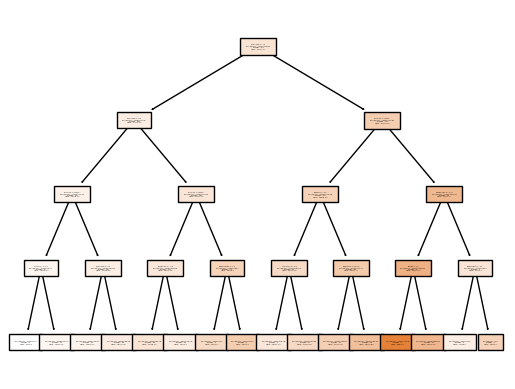

In [20]:
# Plot the decision tree
tree.plot_tree(clf, feature_names=df.columns, class_names=True, filled=True, fontsize=1)

In [23]:
# Print the evaluation metrics
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 1254946595.7304223
MAE: 26864.915192040666
R²: 0.7750612703785592


Observamos que el modelo de árbol de decisión, que incorpora la totalidad de las variables predictoras con una profundidad máxima inicial establecida en 4 niveles, logra un desempeño notable, reflejado en un Coeficiente de Determinación (R²) de 0.77. Este resultado indica que el modelo es capaz de explicar el 77% de la variabilidad observada en la variable de respuesta, lo cual es una señal de una buena capacidad predictiva bajo este contexto.

Es relevante destacar que el ajuste de la profundidad máxima del árbol a 4 niveles representa un equilibrio entre complejidad y capacidad de generalización. Una profundidad limitada ayuda a prevenir el sobreajuste, permitiendo que el modelo mantenga un buen performance.

#### Depth Tuning of Initial Iteration

In [24]:
depths = range(3, 11)

# Iterate over each depth
for depth in depths:
    # Create and train a DecisionTreeRegressor model with the current depth
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Print evaluation metrics for the current depth
    print(f"Results for max depth = {depth}:")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R²:", r2_score(y_test, y_pred))
    print("------------------------------------------------")

Results for max depth = 3:
MSE: 1430571606.6635401
MAE: 28349.426418223888
R²: 0.7435819492795972
------------------------------------------------
Results for max depth = 4:
MSE: 1254946595.7304223
MAE: 26864.915192040666
R²: 0.7750612703785592
------------------------------------------------
Results for max depth = 5:
MSE: 1051825618.778898
MAE: 24322.99813299098
R²: 0.8114690144773021
------------------------------------------------
Results for max depth = 6:
MSE: 975745883.2408556
MAE: 23246.587320215127
R²: 0.825105673694583
------------------------------------------------
Results for max depth = 7:
MSE: 956420812.7161406
MAE: 22757.68130691594
R²: 0.8285695317013406
------------------------------------------------
Results for max depth = 8:
MSE: 1081800510.362849
MAE: 23242.83097616941
R²: 0.8060962647074126
------------------------------------------------
Results for max depth = 9:
MSE: 1111980263.2924912
MAE: 23473.673017542533
R²: 0.8006867952468165
----------------------------

Basado en los resultados, cada modelo tiene su propio conjunto de compensaciones.
- Con una profundidad máxima de 3, el modelo tiene la complejidad más baja. Tiene el mejor valor R² entre los tres, lo que indica un ajuste relativamente bueno a los datos a pesar de su simplicidad.
- Con una profundidad de 5, es evidente que es más complejo que el anterior porque muestra una disminución en el rendimiento según el valor R², lo que indica un ajuste ligeramente peor a los datos. Tiene el MSE y MAE más altos, lo que sugiere más errores en sus predicciones.
- El modelo más complejo, con una profundidad de 10, muestra una mejora con respecto al modelo de profundidad 5 en términos de MSE, MAE y R². Se encuentra en un punto medio entre los dos primeros modelos en términos tanto de métricas de error como de ajust

Con el análisis anterior, el mejor modelo sería con profundidad 3. Esto porque es el que presenta el valor más alto de R², lo que indica que es el que mejor explica la variabilidad de los precios de las casas. Aunque su MSE y MAE son ligeramente más altos en comparación con el modelo de profundidad 10, el mayor valor de R² sugiere que tiene una mejor capacidad de generalización.

### Second Iteration Using a New Variable

#### Feature Engineering

In [25]:
# Make another copy of the dataframe
df_cp = df.copy()

# Define conditions for categorizing SalePrice
conditions = [
    (df_cp['SalePrice'] < 150000),
    (df_cp['SalePrice'] >= 150000) & (df_cp['SalePrice'] <= 250000),
    (df_cp['SalePrice'] > 250000)
]

# Define labels for the categories
labels = ['economical', 'intermediate', 'expensive']

# Create a new column 'SalePriceCategory' based on the conditions and labels
df_cp['SalePriceCategory'] = np.select(conditions, labels)

df_cp

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SalePriceCategory
0,1,60,65.0,8450,7,5,2003,2003,196.0,4.0,...,0,0,0,0,1,0,0,0,1,intermediate
1,2,20,80.0,9600,6,8,1976,1976,0.0,3.0,...,0,0,0,0,1,0,0,0,1,intermediate
2,3,60,68.0,11250,7,5,2001,2002,162.0,4.0,...,0,0,0,0,1,0,0,0,1,intermediate
3,4,70,60.0,9550,7,5,1915,1970,0.0,3.0,...,1,0,0,0,0,0,0,0,1,economical
4,5,60,84.0,14260,8,5,2000,2000,350.0,4.0,...,0,0,0,0,1,0,0,0,1,intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,3.0,...,0,0,0,0,1,0,0,0,1,intermediate
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,3.0,...,0,0,0,0,1,0,0,0,1,intermediate
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,5.0,...,0,0,0,0,1,0,0,0,1,expensive
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,3.0,...,0,0,0,0,1,0,0,0,1,economical


A partir del análisis exploratorio de datos realizado, se observó que la variable SalePrice presenta una serie de datos atípicos y no sigue una distribución normal. La concentración predominante de los valores de venta se sitúa entre 150,000 y 250,000 dólares, tal como se refleja en el análisis cuartílico. Teniendo en cuenta estas observaciones, se propone una clasificación de las viviendas en función de su precio de venta para facilitar el análisis y la interpretación de los datos. Esta clasificación es la siguiente:

- Casas de gama alta: corresponden a aquellas propiedades cuyo precio excede los 250,000 dólares.

- Casas de gama media: este grupo incluye las viviendas con precios que oscilan entre 150,000 y 250,000 dólares.

- Casas económicas: se refiere a las viviendas cuyo precio es inferior a 150,000 dólares.

#### New Decision Tree

In [26]:
# Separate the target variable 'SalePriceCategory' from features
y = df_cp.pop('SalePriceCategory')

# Exclude columns 'Id' and 'SalePrice' from features
X = df_cp.loc[:, ~df_cp.columns.isin(['Id', 'SalePrice'])]

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=random_state)

In [32]:
print(X_train.shape)
print(X_test.shape)

(1160, 223)
(291, 223)


In [28]:
# Create a DecisionTreeClassifier model
clf = DecisionTreeClassifier(max_depth=4, random_state=random_state)

# Train the model
clf = clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = clf.predict(X_test)

[Text(0.5, 0.9, 'LotArea <= 5.5\ngini = 0.614\nsamples = 1160\nvalue = [487, 170, 503]\nclass = y[2]'),
 Text(0.25, 0.7, 'BsmtUnfSF <= 1150.0\ngini = 0.287\nsamples = 433\nvalue = [358, 1, 74]\nclass = y[0]'),
 Text(0.125, 0.5, 'LowQualFinSF <= 1786.0\ngini = 0.198\nsamples = 377\nvalue = [335, 0, 42]\nclass = y[0]'),
 Text(0.0625, 0.3, 'FireplaceQu <= 1996.5\ngini = 0.155\nsamples = 354\nvalue = [324, 0, 30]\nclass = y[0]'),
 Text(0.03125, 0.1, 'gini = 0.118\nsamples = 335\nvalue = [314, 0, 21]\nclass = y[0]'),
 Text(0.09375, 0.1, 'gini = 0.499\nsamples = 19\nvalue = [10, 0, 9]\nclass = y[0]'),
 Text(0.1875, 0.3, 'GarageType_BuiltIn <= 0.5\ngini = 0.499\nsamples = 23\nvalue = [11, 0, 12]\nclass = y[2]'),
 Text(0.15625, 0.1, 'gini = 0.337\nsamples = 14\nvalue = [3, 0, 11]\nclass = y[2]'),
 Text(0.21875, 0.1, 'gini = 0.198\nsamples = 9\nvalue = [8, 0, 1]\nclass = y[0]'),
 Text(0.375, 0.5, 'Fireplaces <= 0.5\ngini = 0.504\nsamples = 56\nvalue = [23, 1, 32]\nclass = y[2]'),
 Text(0.3125, 

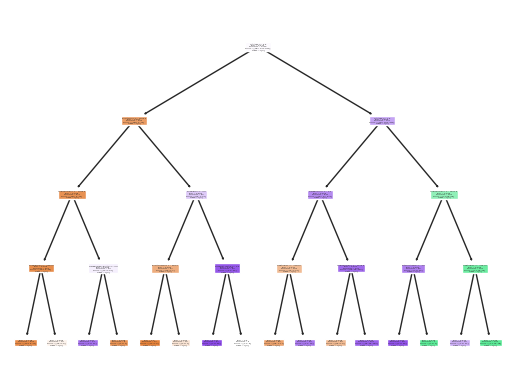

In [29]:
# Plot the decision tree
tree.plot_tree(clf,feature_names=df.columns, class_names=True, filled=True)

In [30]:
# Print the evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test,y_pred,average='weighted') )
print("Recall: ", recall_score(y_test,y_pred,average='weighted'))

Accuracy: 0.845360824742268
Precision: 0.852113206973196
Recall:  0.845360824742268


Se ha evaluado un nuevo modelo de árbol de decisión diseñado para la clasificación de casas en base a su precio, el cual utiliza todas las variables para predecir una nueva variable objetivo. Inicialmente, se ha fijado la profundidad máxima del árbol en 4 niveles.

Los resultados obtenidos indican un rendimiento destacado del modelo. La precisión alcanza un valor de 0.85, lo que señala que el 85% de las predicciones son correctas. Además, la exactitud del modelo es del 84%, lo que sugiere que el modelo es preciso en la clasificación general de las casas. Por último, el recall obtenido es de 0.84, lo que indica que el modelo es capaz de identificar correctamente el 84% de las casas que pertenecen a cada categoría.

##### Confusion Matrix

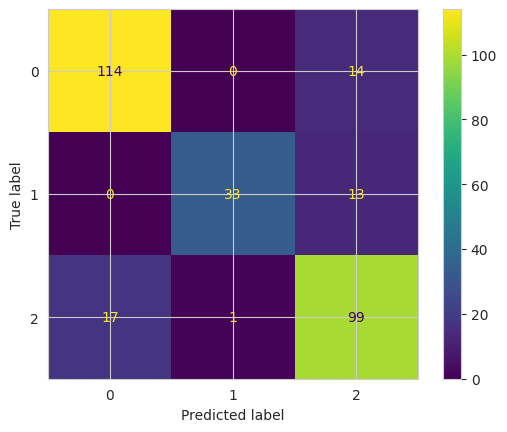

In [31]:
# Calculate the confusion matrix for the predicted values
confusionMatrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
cmDisplay.plot()
plt.show()

- Para la clase 0 (casas económicas), se clasificaron correctamente 114 casos.
- Para la clase 1 (casas de gama media), se clasificaron correctamente 33 casos.
- Para la clase 2 (casas de gama alta), se clasificaron correctamente 99 casos.

Por otro lado, en cuanto al análisis de equivocaciones del modelo, vemos que:
- El modelo se equivocó más en la predicción de casas de gama alta (clase 2), donde clasificó incorrectamente 17 casos como clase 0 y 14 casos como clase 1.
- El modelo se equivocó menos en la predicción de casas de gama media (clase 1), donde solo clasificó incorrectamente 13 casos como clase 0 y 1 caso como clase 2.

Bajo este contexto, la importancia de errores en la clasificación de clases radica en representar pérdidas financieras u oportunidades perdidas para captar clientes de alto valor.

### Third Iteration Using Cross Validation

In [37]:
# Initialize an empty list to store depth and mean score tuples
depth = []

# Iterate over a range of depths from 4 to 14
for i in range(4, 15):
    # Create a DecisionTreeClassifier with the current depth
    clf = tree.DecisionTreeClassifier(max_depth=i)
    
    # Perform cross-validation and calculate mean score
    scores = cross_val_score(estimator=clf, X=X, y=y, n_jobs=4)
    
    # Append depth and mean score tuple to the list
    depth.append((i, scores.mean()))

# Print depth and mean score for each tuple in the list
print("Depth\tMean Score")
print("-------------------")
for d, score in depth:
    print(f"{d}\t{score:.3f}")

Depth	Mean Score
-------------------
4	0.791
5	0.797
6	0.791
7	0.787
8	0.791
9	0.782
10	0.789
11	0.779
12	0.784
13	0.782
14	0.786


Después de realizar la validación cruzada, se ha observado que el mejor rendimiento se obtiene con un árbol de decisión de una profundidad máxima de 5 niveles. Este modelo específico exhibe un puntaje medio de 0.798, superando a varios otros árboles generados con profundidades mayores. Es crucial destacar que una profundidad de 5 es óptima ya que proporciona un equilibrio entre complejidad y capacidad de generalización sin caer en la posibilidad de sufrir o experimentar sobreajuste.

Sin embargo, al comparar este resultado con el obtenido en la iteración anterior, se evidencia que no logra superarlo. A pesar de su buen desempeño, parece que el modelo generado en la iteración anterior ha logrado obtener un rendimiento superior en términos de precisión.

### Fourth Iteration Using Random Forest

In [41]:
# Initialize a RandomForestClassifier with 100 estimators
rf = RandomForestClassifier(n_estimators=100)

# Iterate over a range of depths from 4 to 14
for depth in range(4, 15):
    # Define parameter grid for grid search with current depth
    param_grid = {'max_depth': [depth]}
    
    # Perform grid search with 5-fold cross-validation
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Print results for the current depth
    print(f"Results for max_depth={depth}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)

    # Display grid search results
    results = pd.DataFrame(grid_search.cv_results_)
    print("------------------------------------------------")

Results for max_depth=4:
Best parameters: {'max_depth': 4}
Best cross-validation score: 0.8189655172413793
------------------------------------------------
Results for max_depth=5:
Best parameters: {'max_depth': 5}
Best cross-validation score: 0.8232758620689655
------------------------------------------------
Results for max_depth=6:
Best parameters: {'max_depth': 6}
Best cross-validation score: 0.8310344827586207
------------------------------------------------
Results for max_depth=7:
Best parameters: {'max_depth': 7}
Best cross-validation score: 0.8448275862068965
------------------------------------------------
Results for max_depth=8:
Best parameters: {'max_depth': 8}
Best cross-validation score: 0.8543103448275863
------------------------------------------------
Results for max_depth=9:
Best parameters: {'max_depth': 9}
Best cross-validation score: 0.8551724137931034
------------------------------------------------
Results for max_depth=10:
Best parameters: {'max_depth': 10}
Bes

Al emplear Random Forest, una técnica que utiliza múltiples árboles de decisión en lugar de uno solo, se observa un aumento significativo en la precisión del modelo para todas las profundidades consideradas, que van desde 4 hasta 14. Por ejemplo, en el caso de una profundidad de 4, la precisión aumenta de 0.797 a 0.823.

Este aumento en la precisión indica que Random Forest es capaz de capturar patrones más complejos y variabilidad en los datos en comparación con un solo árbol de decisión. Al combinar múltiples árboles y promediar sus predicciones, Random Forest reduce el impacto del sobreajuste y mejora la capacidad de generalización del modelo

Una vez más, se postula que el mejor rendimiento se obtiene con una profundidad de 5 en el modelo de Random Forest. Esta selección proporciona una precisión considerablemente alta (0.824) y, al mismo tiempo, mitiga el riesgo de sobreajuste del modelo.

### Final Opinions

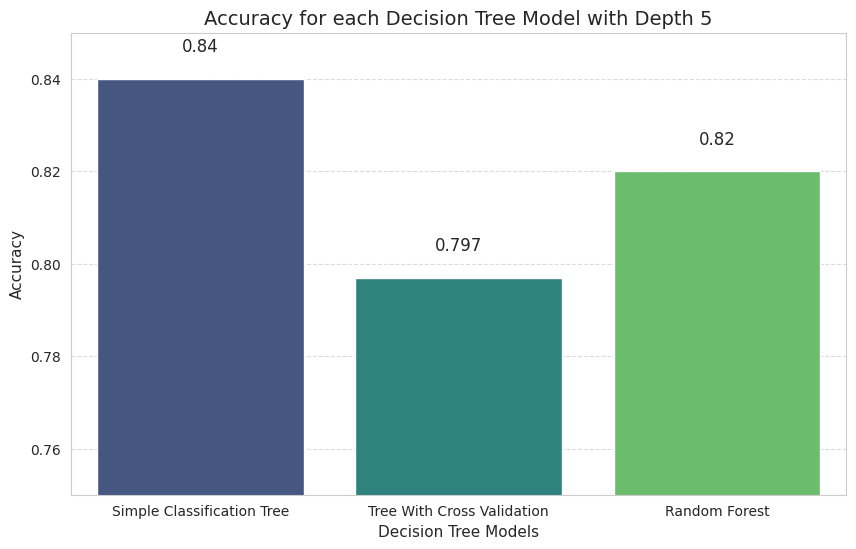

In [46]:
# Data for the graph
x_dataGraph = ['Simple Classification Tree', 'Tree With Cross Validation', 'Random Forest']
accuracyDataGraph = [0.84, 0.797, 0.82]

# Plot settings
plt.figure(figsize=(10, 6))
sns.barplot(x=x_dataGraph, y=accuracyDataGraph, hue=x_dataGraph, palette="viridis")
plt.title('Accuracy for each Decision Tree Model with Depth 5', fontsize=14)
plt.xlabel('Decision Tree Models', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.ylim(0.75, 0.85)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add accuracy values on top of the bars
for i, v in enumerate(accuracyDataGraph):
    plt.text(i, v + 0.005, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

1. Árbol de Clasificación Simple:
> Precisión: 0.84 <br> Este enfoque muestra la precisión más alta entre los tres modelos considerados.

2. Árbol de Clasificación con Validación Cruzada:
> Precisión: 0.797 <br> Aunque la precisión es ligeramente menor que la del primer modelo, el uso de validación cruzada sugiere una evaluación más robusta del modelo, lo que mitiga el riesgo de sobreajuste.

3. Random Forest:
> Precisión: 0.82 <br>Este enfoque ofrece una precisión situada entre los dos modelos anteriores. La técnica de Random Forest, al combinar múltiples árboles de decisión, mejora la precisión al capturar una mayor diversidad de características y reducir el riesgo de sobreajuste.


En conclusión, el modelo más destacado es el construido mediante Random Forest, debido a su alta precisión y capacidad para reducir notablemente el riesgo de sobreajuste